## Preprocessing of data, Part 3B - remove rows with missing values

In this notebook will we also work with the csv-file we created in part 2. But before we start remove all rows that contains missing data, we will change the missing data in a few columns.

### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Uses csv-file with unwanted columns and data removed
df = pd.read_csv('germany_housing_data_part2_after_cleaning.csv')
df.head()

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition,Heating,Energy_source,State,Garagetype,Type,Price
0,106.00,229.0,5.5,3.0,1.0,2.0,2005.0,NaN,2.0,modernized,central heating,gas,Baden-Württemberg,Parking lot,Multiple dwelling,498000.0
1,140.93,517.0,6.0,3.0,2.0,NaN,1994.0,NaN,7.0,modernized,stove heating,NaN,Baden-Württemberg,Parking lot,Mid-terrace house,495000.0
2,162.89,82.0,5.0,3.0,2.0,4.0,2013.0,NaN,1.0,dilapidated,stove heating,other combinations of energy sources,Baden-Württemberg,Garage,Farmhouse,749000.0
3,140.00,814.0,4.0,NaN,2.0,2.0,1900.0,2000.0,1.0,fixer-upper,central heating,electricity,Baden-Württemberg,Garage,Farmhouse,259000.0
4,115.00,244.0,4.5,2.0,1.0,NaN,1968.0,2019.0,1.0,refurbished,central heating,oil,Baden-Württemberg,Garage,Multiple dwelling,469000.0


### First check of dataset

We start with a check of the dataset - what it contains and where the missing data is located. We also add a graph how much data is missing in the different columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    10527 non-null  float64
 1   Lot             10527 non-null  float64
 2   Rooms           10527 non-null  float64
 3   Bedrooms        6854 non-null   float64
 4   Bathrooms       8726 non-null   float64
 5   Floors          7865 non-null   float64
 6   Year_built      9834 non-null   float64
 7   Year_renovated  5326 non-null   float64
 8   Garages         8573 non-null   float64
 9   Condition       10206 non-null  object 
 10  Heating         9946 non-null   object 
 11  Energy_source   9301 non-null   object 
 12  State           10526 non-null  object 
 13  Garagetype      8573 non-null   object 
 14  Type            10126 non-null  object 
 15  Price           10527 non-null  float64
dtypes: float64(10), object(6)
memory usage: 1.3+ MB


In [4]:
# How many null-value is in each column
df.isnull().sum()

Living_space         0
Lot                  0
Rooms                0
Bedrooms          3673
Bathrooms         1801
Floors            2662
Year_built         693
Year_renovated    5201
Garages           1954
Condition          321
Heating            581
Energy_source     1226
State                1
Garagetype        1954
Type               401
Price                0
dtype: int64

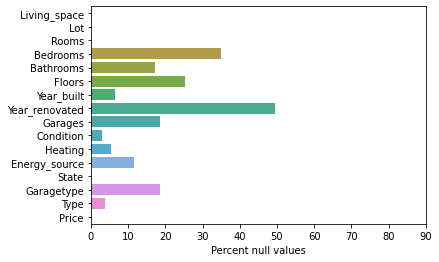

In [5]:
sns.barplot(x=df.isnull().sum()/df.shape[0] * 100, y=df.columns)
bins = np.arange(0, 100, 10)
plt.xlabel("Percent null values")
plt.xticks(bins)
plt.show()

### Replace missing values in column 'Garages' and 'Garagetype'

Since there are no values for 0 garages, we concluded that a large percent, if not all, of the missing data in these columns could be just that. Houses with no parking left it blank. We decided to replace the missing data in 'Garages' with 0 and in 'Garagetype' with a new value 'No parking'

In [6]:
values = {'Garages': 0, 'Garagetype': 'No parking'}
df.fillna(value=values, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    10527 non-null  float64
 1   Lot             10527 non-null  float64
 2   Rooms           10527 non-null  float64
 3   Bedrooms        6854 non-null   float64
 4   Bathrooms       8726 non-null   float64
 5   Floors          7865 non-null   float64
 6   Year_built      9834 non-null   float64
 7   Year_renovated  5326 non-null   float64
 8   Garages         10527 non-null  float64
 9   Condition       10206 non-null  object 
 10  Heating         9946 non-null   object 
 11  Energy_source   9301 non-null   object 
 12  State           10526 non-null  object 
 13  Garagetype      10527 non-null  object 
 14  Type            10126 non-null  object 
 15  Price           10527 non-null  float64
dtypes: float64(10), object(6)
memory usage: 1.3+ MB


### Replace missing values in column 'Year_renovated'  with 'Year_built'

In the same way, we decided to replace a missing value in 'Year_renovated' with the value of 'Year_built'. 
The reason was that a large part of those who left 'Year_renovated' blank may not have done any renovation. 

However we concludes that the value should not be set as 0, because there is a big difference in a unrenovated house from 1970 and a unrenovated house from 2015. So we chose to use de value for 'Year_built'. 

'Year_renovated' will now only have missing data if there is missing data for 'Year_built' also.

In [8]:
# Replace missing value in 'Year_renovated' with value from 'Year_built'
df.Year_renovated.fillna(df.Year_built, inplace=True)

We check the dataset after this change.

In [9]:
# Show df in new form
df

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition,Heating,Energy_source,State,Garagetype,Type,Price
0,106.00,229.0,5.5,3.0,1.0,2.0,2005.0,2005.0,2.0,modernized,central heating,gas,Baden-Württemberg,Parking lot,Multiple dwelling,498000.0
1,140.93,517.0,6.0,3.0,2.0,NaN,1994.0,1994.0,7.0,modernized,stove heating,NaN,Baden-Württemberg,Parking lot,Mid-terrace house,495000.0
2,162.89,82.0,5.0,3.0,2.0,4.0,2013.0,2013.0,1.0,dilapidated,stove heating,other combinations of energy sources,Baden-Württemberg,Garage,Farmhouse,749000.0
3,140.00,814.0,4.0,NaN,2.0,2.0,1900.0,2000.0,1.0,fixer-upper,central heating,electricity,Baden-Württemberg,Garage,Farmhouse,259000.0
4,115.00,244.0,4.5,2.0,1.0,NaN,1968.0,2019.0,1.0,refurbished,central heating,oil,Baden-Württemberg,Garage,Multiple dwelling,469000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10522,167.00,683.0,6.5,4.0,3.0,NaN,1976.0,2015.0,1.0,first occupation after refurbishment,stove heating,district heating,Bayern,Garage,Special property,1495000.0
10523,222.00,4000.0,6.0,5.0,3.0,1.0,2017.0,2020.0,4.0,dilapidated,oil heating,geothermal energy,Sachsen-Anhalt,Parking lot,Mid-terrace house,449000.0
10524,142.00,377.0,4.0,3.0,NaN,NaN,2021.0,2021.0,2.0,dilapidated,central heating,NaN,Bayern,Garage,Mid-terrace house,678000.0
10525,120.83,501.0,5.0,NaN,1.0,2.0,2019.0,2019.0,1.0,NaN,stove heating,NaN,Sachsen-Anhalt,Garage,Mid-terrace house,419900.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    10527 non-null  float64
 1   Lot             10527 non-null  float64
 2   Rooms           10527 non-null  float64
 3   Bedrooms        6854 non-null   float64
 4   Bathrooms       8726 non-null   float64
 5   Floors          7865 non-null   float64
 6   Year_built      9834 non-null   float64
 7   Year_renovated  10187 non-null  float64
 8   Garages         10527 non-null  float64
 9   Condition       10206 non-null  object 
 10  Heating         9946 non-null   object 
 11  Energy_source   9301 non-null   object 
 12  State           10526 non-null  object 
 13  Garagetype      10527 non-null  object 
 14  Type            10126 non-null  object 
 15  Price           10527 non-null  float64
dtypes: float64(10), object(6)
memory usage: 1.3+ MB


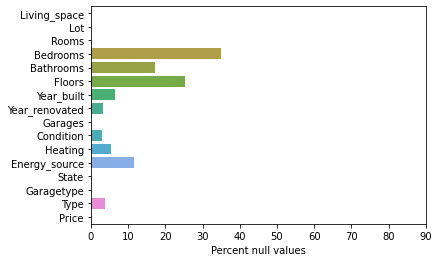

In [11]:
sns.barplot(x=df.isnull().sum()/df.shape[0] * 100, y=df.columns)
bins = np.arange(0, 100, 10)
plt.xlabel("Percent null values")
plt.xticks(bins)
plt.show()

### Remove all remaining rows with missing data

We remove all rows that still contains a missing value and check the dataset again

In [12]:
# Removes all rows with a missing value
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4142 entries, 0 to 10526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    4142 non-null   float64
 1   Lot             4142 non-null   float64
 2   Rooms           4142 non-null   float64
 3   Bedrooms        4142 non-null   float64
 4   Bathrooms       4142 non-null   float64
 5   Floors          4142 non-null   float64
 6   Year_built      4142 non-null   float64
 7   Year_renovated  4142 non-null   float64
 8   Garages         4142 non-null   float64
 9   Condition       4142 non-null   object 
 10  Heating         4142 non-null   object 
 11  Energy_source   4142 non-null   object 
 12  State           4142 non-null   object 
 13  Garagetype      4142 non-null   object 
 14  Type            4142 non-null   object 
 15  Price           4142 non-null   float64
dtypes: float64(10), object(6)
memory usage: 550.1+ KB


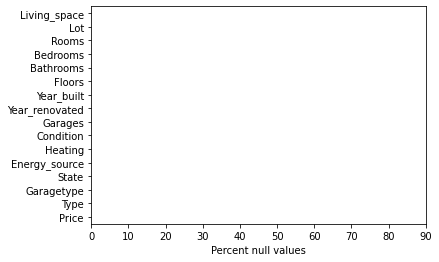

In [14]:
sns.barplot(x=df.isnull().sum()/df.shape[0] * 100, y=df.columns)
bins = np.arange(0, 100, 10)
plt.xlabel("Percent null values")
plt.xticks(bins)
plt.show()

### Result

Our dataset went from 10 527 to 4 142 rows after first change missing values in 'Garages','Garagetype' and 'Year_renovated', and then remove remaining missing values.

This can compare to Part 3A (where we removed all rows with missing data) there we went from 10 552 to 2 062 rows after removing missing values.

### Saving the changes

We save our changes to a new csv-file to use, when we start the process of trying to find the best model.

In [15]:
# Create a new csv-file based on this option
df.to_csv('germany_housing_data_part3B_removed_missing_values.csv', index=False)